In [49]:
import pandas as pd
import os 
from pathlib import Path
import seaborn as sns

In [16]:
path = r'C:\Users\aimbe\OneDrive\Документы\GitHub\karpov_courses\Lesson 4\4_data\data'

In [17]:
print(path)

C:\Users\aimbe\OneDrive\Документы\GitHub\karpov_courses\Lesson 4\4_data\data


In [38]:
df = pd.DataFrame()

for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
        data_path = part_path / file
        temp_df = pd.read_csv(data_path)
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        temp_df['date'] = date
        temp_df['name'] = name
        
        df = pd.concat((df, temp_df))

In [41]:
df.head()

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov


In [48]:
df\
    .groupby('name', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [52]:
top_10 = df\
    .groupby('product_id', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)\
    .head(10)

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

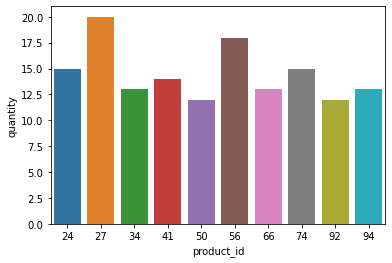

In [54]:
sns.barplot(data=top_10, x='product_id', y='quantity')

In [57]:
df\
    .groupby(['name', 'product_id'])\
    .agg({'date':pd.Series.nunique})\
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
